# Project 1 – Decision Trees and Random Forests

In [16]:
# Reload all modules without having to restart the kernel
# Useful for development if you have edited any of the external code files.
%load_ext autoreload
%autoreload 2

# Imports
import numpy as np
import matplotlib.pyplot as plt

from random_forest import RandomForest
from decision_tree import DecisionTree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
seed = 42
np.random.seed(seed)

## Dataset

Do data loading, exploration and preprocessing as you see fit.

Here is some code to load the dataset to get you started.

In [18]:
data = np.genfromtxt("letters.csv", delimiter=",", dtype=float, names=True)

feature_names = list(data.dtype.names[:-1])
target_name = data.dtype.names[-1]

X = np.array([data[feature] for feature in feature_names]).T
y = data[target_name].astype(int)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y
)

print(f"Feature columns names: {feature_names}")
print(f"Target column name: {target_name}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Feature columns names: ['xbox', 'ybox', 'width', 'high', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'xege', 'xegvy', 'yege', 'yegvx']
Target column name: label
X shape: (2000, 16)
y shape: (2000,)


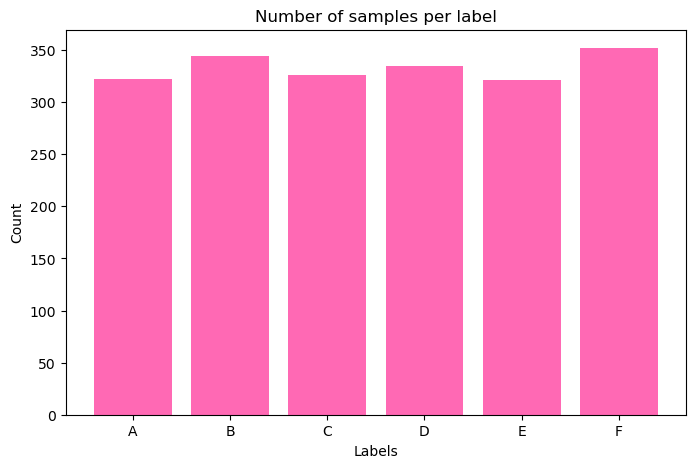

In [19]:


label_names = ["A", "B", "C", "D", "E", "F"]
unique_labels, counts = np.unique(y, return_counts=True)
x_labels = [label_names[i] for i in unique_labels]

plt.figure(figsize=(8,5))
plt.bar(x_labels, counts, color='#FF69B4')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Number of samples per label')
plt.xticks(x_labels)
plt.show()

In [ ]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100],
}

dt = DecisionTree(random_state=seed)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

grid_dt.fit(X_trainval, y_trainval)

print("Best DT hyperparameters:", grid_dt.best_params_)
print("Best mean CV accuracy:", grid_dt.best_score_)

test_preds = grid_dt.best_estimator_.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, test_preds))


Best DT hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Best mean CV accuracy: 0.9228571428571429
Test accuracy: 0.9016666666666666


In [ ]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100],
}

dt = DecisionTreeClassifier(random_state=seed)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

grid_dt.fit(X_trainval, y_trainval)

print("Best DT hyperparameters:", grid_dt.best_params_)
print("Best mean CV accuracy:", grid_dt.best_score_)


test_preds = grid_dt.best_estimator_.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, test_preds))

Best DT hyperparameters: {'criterion': 'entropy', 'max_depth': 12}
Best mean CV accuracy: 0.9257142857142858
Test accuracy: 0.9033333333333333


In [22]:
param_grid_rf = {
    "n_estimators": [2, 5, 10, 15, 20, 50],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 5, 10, 20, 50, None],
    "max_features": ["sqrt", "log2", None]
}

rf_wrapper = RandomForest(random_state=seed)

grid_rf = GridSearchCV(
    estimator=rf_wrapper,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_trainval, y_trainval)

print("Best RF hyperparameters:", grid_rf.best_params_)
print("Best mean CV accuracy:", grid_rf.best_score_)

test_preds = grid_rf.best_estimator_.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, test_preds))



Best RF hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}
Best mean CV accuracy: 0.9657142857142856
Test accuracy: 0.9566666666666667


In [31]:
param_grid_rf = {
    "n_estimators": [2, 5, 10, 15, 20, 50],
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 5, 10, 20, 50, None],
    "max_features": ["sqrt", "log2", None]
}

rf_wrapper = RandomForestClassifier(random_state=seed)

grid_rf = GridSearchCV(
    estimator=rf_wrapper,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_trainval, y_trainval)

print("Best RF hyperparameters:", grid_rf.best_params_)
print("Best mean CV accuracy:", grid_rf.best_score_)


test_preds = grid_rf.best_estimator_.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, test_preds))



Best RF hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}
Best mean CV accuracy: 0.9692857142857143
Test accuracy: 0.9516666666666667


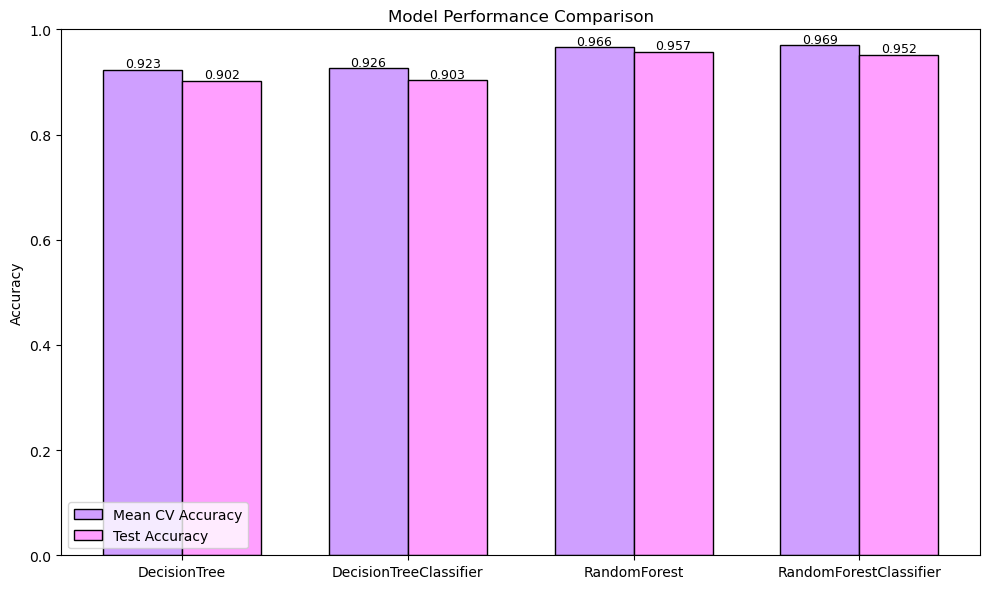

In [32]:

models = [
    "DecisionTree",
    "DecisionTreeClassifier",
    "RandomForest",
    "RandomForestClassifier",
]

cv_scores = [
    0.9229,  # DecisionTree
    0.9257,  # DecisionTreeClassifier
    0.9657,  # RandomForest
    0.9693,  # RandomForestClassifier
]

test_scores = [
    0.9017,
    0.9033,
    0.9567,
    0.9517,
]

x = np.arange(len(models))  
width = 0.35  


plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cv_scores, width, label="Mean CV Accuracy", color="#CF9FFF", edgecolor='black')
plt.bar(x + width/2, test_scores, width, label="Test Accuracy", color="#FF9FFF", edgecolor='black')


plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(x, models)
plt.ylim(0.0, 1.0) 
plt.legend()

for i, v in enumerate(cv_scores):
    plt.text(i - width/2, v + 0.005, f"{v:.3f}", ha="center", fontsize=9)
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 0.005, f"{v:.3f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()


Feature importances: [2.76666667e-03 1.98333333e-03 8.33333333e-05 4.33333333e-04
 3.00000000e-04 4.00000000e-03 2.68833333e-02 2.25500000e-02
 1.99166667e-02 6.13333333e-03 7.83333333e-03 3.03900000e-01
 1.91333333e-02 7.60000000e-03 2.14800000e-01 1.87666667e-02]


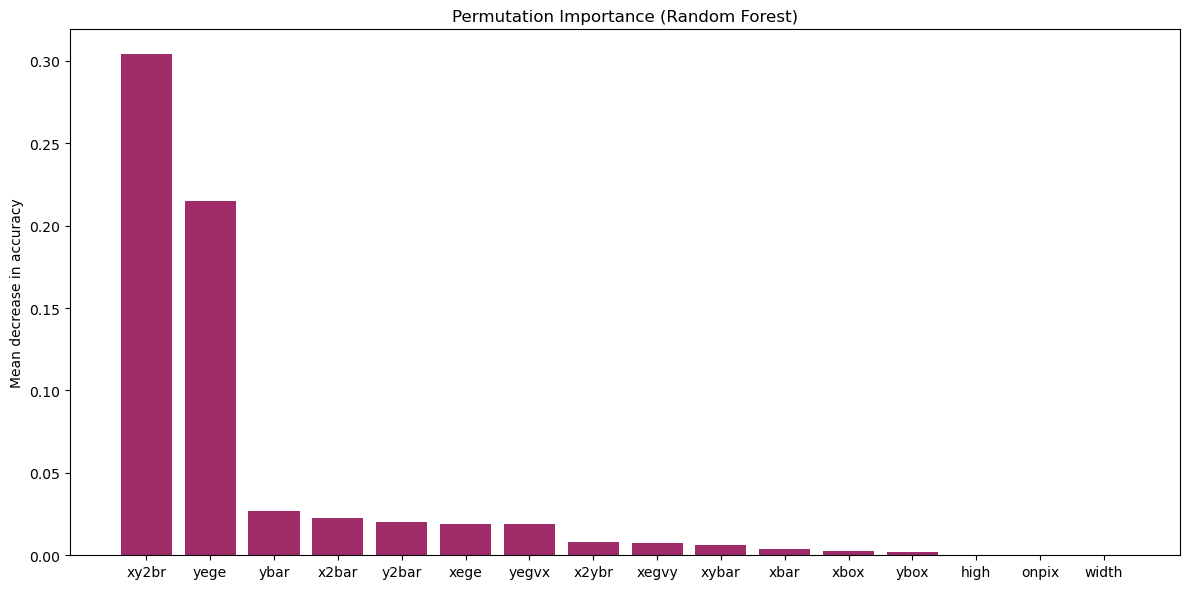

In [33]:
result = permutation_importance(
    estimator=grid_rf.best_estimator_,
    X=X,
    y=y,
    scoring="accuracy",
    n_repeats=30,
    random_state=seed,
)

print("Feature importances:", result.importances_mean)

def plot_permutation_importance(importances, feature_names):
    sorted_idx = importances.argsort()[::-1]
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importances)), importances[sorted_idx], align="center", color='#9F2B68')
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx])
    plt.ylabel("Mean decrease in accuracy")
    plt.title("Permutation Importance (Random Forest)")
    plt.tight_layout()
    plt.show()

plot_permutation_importance(result.importances_mean, feature_names)
